In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

In [50]:
filename = "data/gemm2000_shuffled.txt"
fw = "data/gemm2000_shuffled_timeperf.txt"

fw_std = "data/gemm2000_shuffled_timeperf_std.txt"

times = []
flops = []
sizes = []
perfs = []
with open(filename) as f:
    lines = f.readlines()
    for line in lines:
        sizes.append(float(line.split()[0]))
        times.append(float(line.split()[1]))
        flops.append(float(line.split()[2]))
        

times = np.array(times)
flops = np.array(flops)
sizes = np.array(sizes)
perfs = (flops/times)*1e-9 

with open(fw,"w") as f:
    for s,t,p in zip(sizes,times,perfs):
        wstr = str(s) + "\t" + str(t) + "\t" + str(p) + "\n"
        f.write(wstr)

times_mean = np.mean(times)
times_std = np.std(times)
times = (times-times_mean)/times_std

perfs_mean = np.mean(perfs)
perfs_std = np.std(perfs)
perfs = (perfs-perfs_mean)/perfs_std

with open(fw_std,"w") as f:
    for s,t,p in zip(sizes,times,perfs):
        wstr = str(s) + "\t" + str(t) + "\t" + str(p) + "\n"
        f.write(wstr)

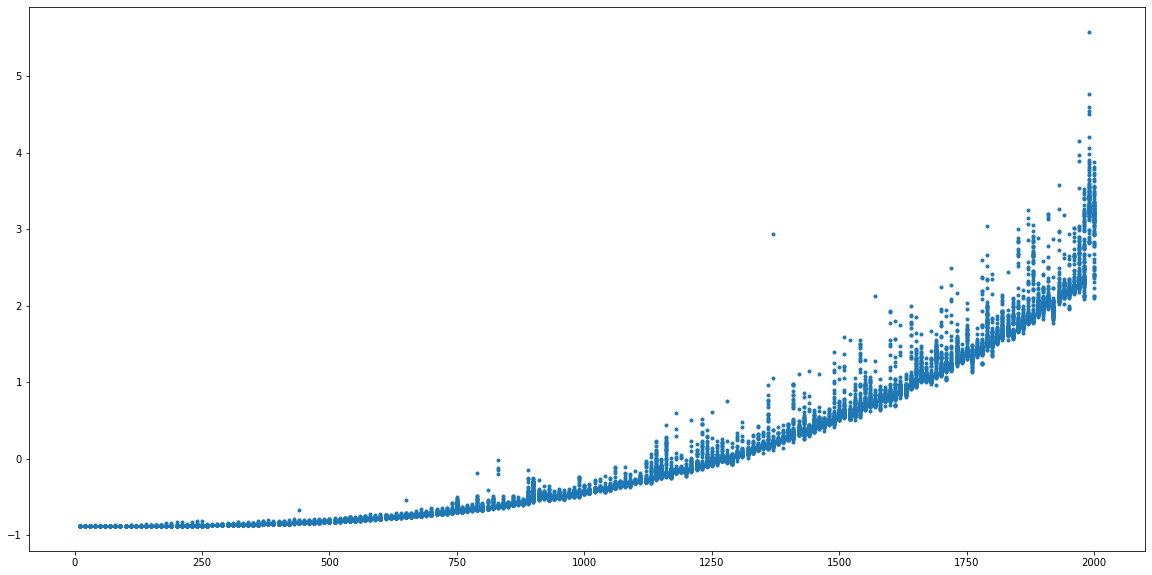

In [36]:
#plt.yscale('log')
plt.plot(sizes,times,'.')

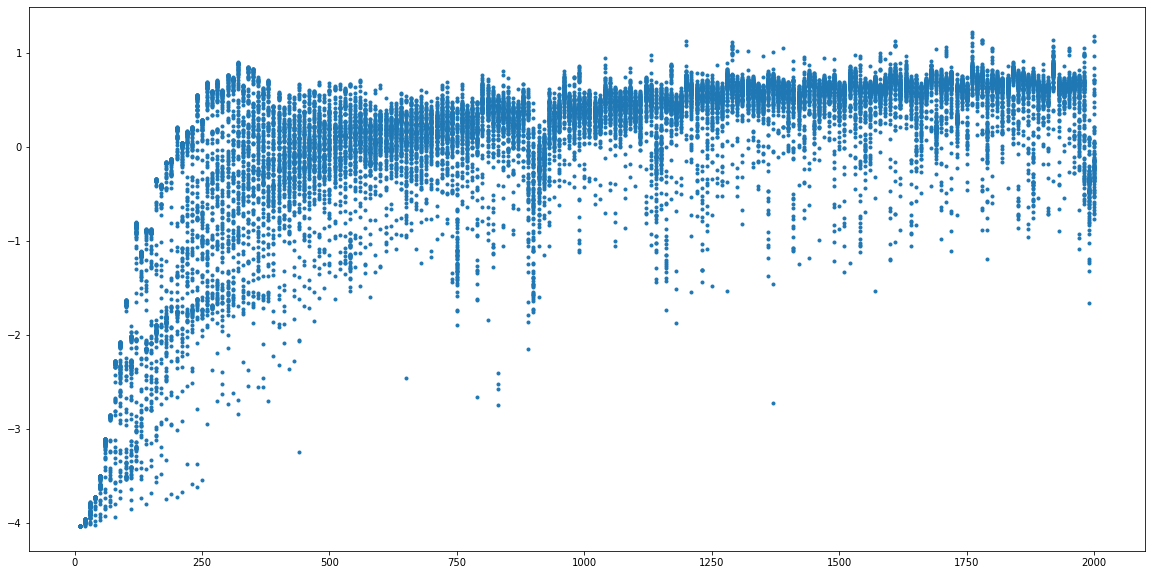

In [46]:
plt.plot(sizes,perfs,'.')